<a href="https://colab.research.google.com/github/CHANDANRAJ00/AIML-lab-2024-Batch-39/blob/main/My_project_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv("reduced_data_1.csv")
df.head()

,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1,1.528089e+09,e,1,tcp,1,192.168.100.147,49960,192.168.100.7,80,...,1.12704,96.0,75.0,1.133720,1.129970,770.0,602.0,1.0,DoS,HTTP
1,2,1.528089e+09,e,1,arp,2,192.168.100.7,-1,192.168.100.147,-1,...,15267.20000,1.0,2.0,0.005142,0.005142,2.0,6.0,1.0,DoS,HTTP
2,3,1.528089e+09,e,1,tcp,1,192.168.100.147,49962,192.168.100.7,80,...,1.12704,96.0,75.0,1.135100,1.129970,770.0,602.0,1.0,DoS,HTTP
3,4,1.528089e+09,e,1,tcp,1,192.168.100.147,49964,192.168.100.7,80,...,1.12704,96.0,75.0,1.135140,1.129970,770.0,602.0,1.0,DoS,HTTP
4,5,1.528089e+09,e,1,tcp,1,192.168.100.147,49966,192.168.100.7,80,...,1.12704,96.0,75.0,1.135260,1.129970,770.0,602.0,1.0,DoS,HTTP


In [2]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31722 entries, 0 to 31721
Data columns (total 46 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   pkSeqID                           31722 non-null  int64  
 1   stime                             31722 non-null  float64
 2   flgs                              31722 non-null  object 
 3   flgs_number                       31722 non-null  int64  
 4   proto                             31722 non-null  object 
 5   proto_number                      31722 non-null  int64  
 6   saddr                             31722 non-null  object 
 7   sport                             31722 non-null  int64  
 8   daddr                             31722 non-null  object 
 9   dport                             31722 non-null  int64  
 10  pkts                              31722 non-null  int64  
 11  bytes                             31722 non-null  int64  
 12  stat

In [3]:
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,pkSeqID,stime,flgs_number,proto_number,sport,dport,pkts,bytes,state_number,ltime,...,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack
count,31722.000000,3.172200e+04,31722.000000,31722.000000,31722.000000,31722.000000,31722.000000,31722.000000,31722.000000,3.172200e+04,...,31721.000000,31721.000000,31721.000000,31721.000000,31721.000000,31721.000000,31721.000000,31721.000000,31721.000000,31721.0
mean,15861.500000,1.528082e+09,1.956150,1.000252,13199.822773,79.979573,5.180789,787.207364,2.685203,1.528082e+09,...,517.672740,2.105302,2.265263,89.023675,88.295640,1.770225,1.402660,407.682734,401.305697,1.0
std,9157.496956,1.523697e+03,0.207972,0.015879,10388.874650,1.286180,1.371599,276.234413,0.728191,1.520941e+03,...,117.735588,156.834013,158.461384,20.711881,21.427472,130.855980,122.650740,152.414996,141.649010,0.0
min,1.000000,1.528081e+09,1.000000,1.000000,-1.000000,-1.000000,2.000000,120.000000,1.000000,1.528081e+09,...,2.000000,0.003857,0.003857,1.000000,1.000000,0.005142,0.005142,2.000000,2.000000,1.0
10%,3173.100000,1.528081e+09,2.000000,1.000000,4123.000000,80.000000,4.000000,616.000000,1.000000,1.528081e+09,...,400.000000,0.127083,0.127083,55.000000,53.000000,0.127064,0.128351,199.000000,196.000000,1.0
25%,7931.250000,1.528081e+09,2.000000,1.000000,6502.000000,80.000000,4.000000,616.000000,3.000000,1.528081e+09,...,443.000000,0.128900,0.128900,86.000000,83.000000,0.128911,0.142783,324.000000,317.000000,1.0
50%,15861.500000,1.528081e+09,2.000000,1.000000,10467.000000,80.000000,5.000000,770.000000,3.000000,1.528081e+09,...,500.000000,0.163166,0.163166,100.000000,100.000000,0.162915,0.163092,400.000000,400.000000,1.0
75%,23791.750000,1.528081e+09,2.000000,1.000000,17241.750000,80.000000,6.000000,830.000000,3.000000,1.528081e+09,...,558.000000,0.185228,0.185228,100.000000,100.000000,0.191371,0.177796,500.000000,500.000000,1.0
90%,28549.900000,1.528081e+09,2.000000,1.000000,21999.900000,80.000000,7.000000,890.000000,3.000000,1.528081e+09,...,619.000000,0.201812,0.201812,100.000000,100.000000,0.223171,0.197689,508.000000,502.000000,1.0
max,31722.000000,1.528089e+09,4.000000,2.000000,55062.000000,80.000000,56.000000,6999.000000,3.000000,1.528090e+09,...,1025.000000,15748.000000,15267.200000,100.000000,100.000000,13245.000000,13245.000000,1000.000000,1000.000000,1.0


In [4]:
df.min()

<ipython-input-4-c3612c624a3f>:1: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.min()


pkSeqID                                            1
stime                               1528081321.63668
flgs                                               e
flgs_number                                        1
proto                                            arp
proto_number                                       1
saddr                                192.168.100.147
sport                                             -1
daddr                                192.168.100.147
dport                                             -1
pkts                                               2
bytes                                            120
state                                            CON
state_number                                       1
ltime                               1528081321.75066
seq                                              9.0
dur                                         0.000127
mean                                             0.0
stddev                                        

In [5]:
df.max()

<ipython-input-5-4c1ddf8920ff>:1: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.max()


pkSeqID                                        31722
stime                                1528088552.0746
flgs                                             e s
flgs_number                                        4
proto                                            tcp
proto_number                                       2
saddr                                  192.168.100.7
sport                                          55062
daddr                                  192.168.100.7
dport                                             80
pkts                                              56
bytes                                           6999
state                                            RST
state_number                                       3
ltime                               1528090077.70659
seq                                          30244.0
dur                                       1555.68396
mean                                         4.91103
stddev                                      2.

In [6]:
df.std()

<ipython-input-6-ce97bb7eaef8>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


pkSeqID                              9157.496956
stime                                1523.696861
flgs_number                             0.207972
proto_number                            0.015879
sport                               10388.874650
dport                                   1.286180
pkts                                    1.371599
bytes                                 276.234413
state_number                            0.728191
ltime                                1520.941236
seq                                  9047.144025
dur                                     9.358541
mean                                    0.256405
stddev                                  0.215593
sum                                     0.569978
min                                     0.150240
max                                     0.494761
spkts                                   0.598275
dpkts                                   0.947198
sbytes                                122.208145
dbytes              

In [7]:
df.mean()

<ipython-input-7-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


pkSeqID                             1.586150e+04
stime                               1.528082e+09
flgs_number                         1.956150e+00
proto_number                        1.000252e+00
sport                               1.319982e+04
dport                               7.997957e+01
pkts                                5.180789e+00
bytes                               7.872074e+02
state_number                        2.685203e+00
ltime                               1.528082e+09
seq                                 1.445352e+04
dur                                 3.044929e+01
mean                                4.235036e-02
stddev                              4.166276e-02
sum                                 1.098910e-01
min                                 9.387872e-03
max                                 1.003843e-01
spkts                               4.712367e+00
dpkts                               4.684594e-01
sbytes                              7.243919e+02
dbytes              

In [8]:
df.median()

<ipython-input-8-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


pkSeqID                             1.586150e+04
stime                               1.528081e+09
flgs_number                         2.000000e+00
proto_number                        1.000000e+00
sport                               1.046700e+04
dport                               8.000000e+01
pkts                                5.000000e+00
bytes                               7.700000e+02
state_number                        3.000000e+00
ltime                               1.528081e+09
seq                                 1.438400e+04
dur                                 3.115299e+01
mean                                0.000000e+00
stddev                              0.000000e+00
sum                                 0.000000e+00
min                                 0.000000e+00
max                                 0.000000e+00
spkts                               5.000000e+00
dpkts                               0.000000e+00
sbytes                              7.700000e+02
dbytes              

In [11]:
df.columns

Index(['pkSeqID', 'stime', 'flgs', 'flgs_number', 'proto', 'proto_number',
       'saddr', 'sport', 'daddr', 'dport', 'pkts', 'bytes', 'state',
       'state_number', 'ltime', 'seq', 'dur', 'mean', 'stddev', 'sum', 'min',
       'max', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'srate', 'drate',
       'TnBPSrcIP', 'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto',
       'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_DstIP',
       'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'AR_P_Proto_P_Sport',
       'AR_P_Proto_P_Dport', 'Pkts_P_State_P_Protocol_P_DestIP',
       'Pkts_P_State_P_Protocol_P_SrcIP', 'attack', 'category', 'subcategory'],
      dtype='object')

<Axes: ylabel='Frequency'>

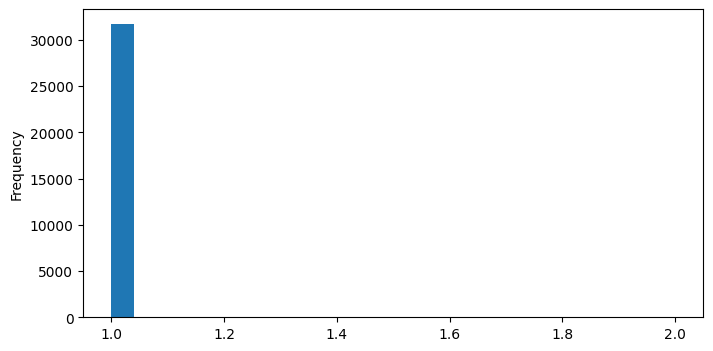

In [13]:
df['proto_number'].plot.hist(bins=25,figsize=(8,4))

In [ ]:
sns.pairplot(df)

<Axes: ylabel='Density'>

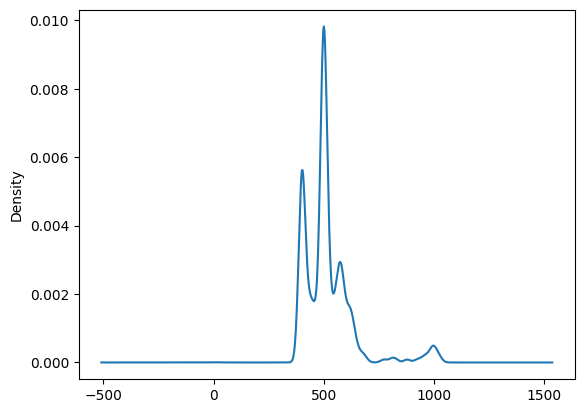

In [15]:
df['TnP_Per_Dport'].plot.density()

In [16]:
df.corr()

<ipython-input-16-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,pkSeqID,stime,flgs_number,proto_number,sport,dport,pkts,bytes,state_number,ltime,...,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack
pkSeqID,1.000000,-0.365806,0.347874,-0.023605,-0.007141,0.023605,-0.243449,-0.364215,-0.020674,-0.365596,...,-0.278368,-0.020928,-0.022478,-0.269075,-0.204553,-0.020670,-0.016903,-0.611094,-0.583825,NaN
stime,-0.365806,1.000000,-0.950004,0.052790,0.823788,-0.052790,0.690531,0.845760,-0.511655,0.999983,...,0.791196,0.055097,0.059074,-0.103103,-0.245840,0.054502,0.044645,0.492224,0.326387,NaN
flgs_number,0.347874,-0.950004,1.000000,-0.073021,-0.781784,0.073021,-0.628889,-0.733610,0.486293,-0.949981,...,-0.748608,-0.056963,-0.061019,0.083506,0.221845,-0.056480,-0.046511,-0.486228,-0.327597,NaN
proto_number,-0.023605,0.052790,-0.073021,1.000000,-0.020182,-1.000000,0.044226,-0.014214,-0.014945,0.054642,...,-0.068285,0.694964,0.681787,-0.067310,-0.057573,0.585787,0.625024,-0.041468,-0.043905,NaN
sport,-0.007141,0.823788,-0.781784,-0.020182,1.000000,0.020182,0.316451,0.546205,-0.301263,0.823686,...,0.459611,-0.009758,-0.005084,-0.160592,-0.276378,-0.001214,-0.011919,0.294809,0.147561,NaN
dport,0.023605,-0.052790,0.073021,-1.000000,0.020182,1.000000,-0.044226,0.014214,0.014945,-0.054642,...,0.068285,-0.694964,-0.681787,0.067310,0.057573,-0.585787,-0.625024,0.041468,0.043905,NaN
pkts,-0.243449,0.690531,-0.628889,0.044226,0.316451,-0.044226,1.000000,0.852071,-0.725342,0.690521,...,0.854789,-0.027704,-0.029795,-0.083216,-0.186710,-0.027150,-0.022326,0.345141,0.226071,NaN
bytes,-0.364215,0.845760,-0.733610,-0.014214,0.546205,0.014214,0.852071,1.000000,-0.580781,0.845740,...,0.825359,-0.028758,-0.030884,-0.087909,-0.201040,-0.028092,-0.023182,0.418244,0.295799,NaN
state_number,-0.020674,-0.511655,0.486293,-0.014945,-0.301263,0.014945,-0.725342,-0.580781,1.000000,-0.511656,...,-0.604931,-0.013620,-0.015945,0.194665,0.262764,-0.015821,-0.009870,-0.037804,0.063510,NaN
ltime,-0.365596,0.999983,-0.949981,0.054642,0.823686,-0.054642,0.690521,0.845740,-0.511656,1.000000,...,0.791048,0.054949,0.058916,-0.103311,-0.246008,0.054356,0.044525,0.491992,0.326178,NaN


<ipython-input-20-4999c9143af2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,linewidths=2)


<Axes: >

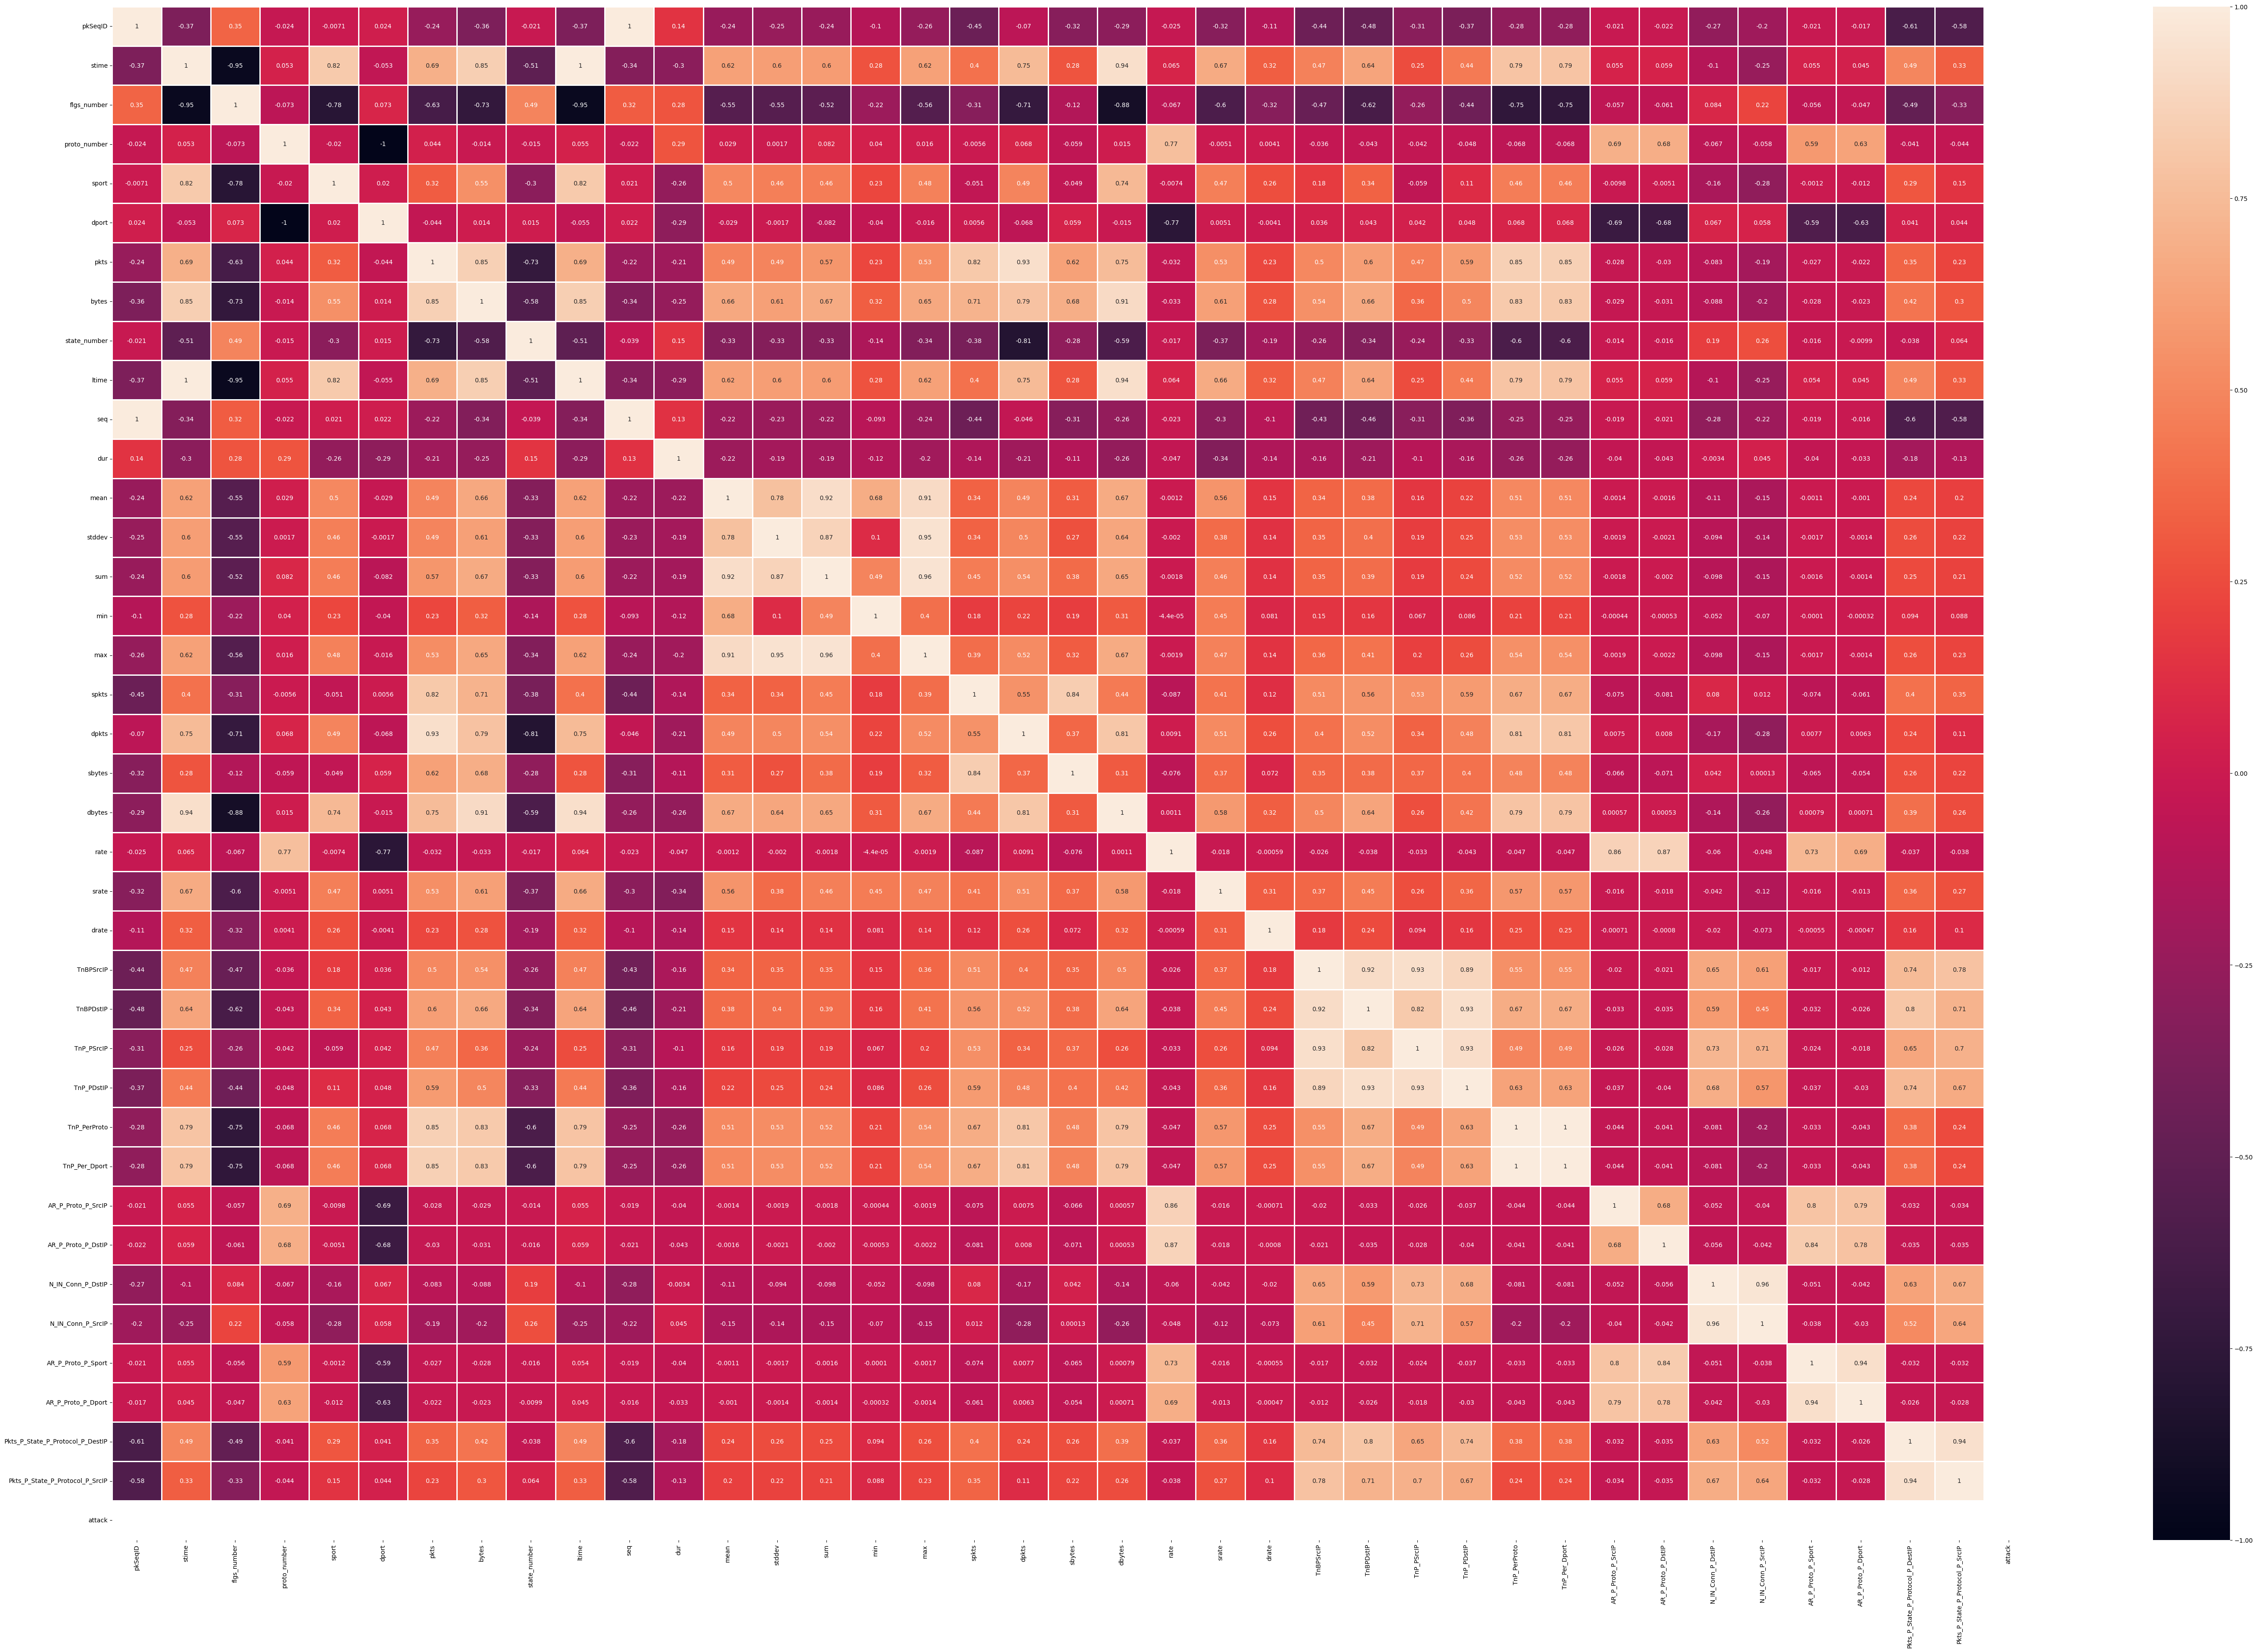

In [20]:
plt.figure(figsize=(70,45))
sns.heatmap(df.corr(),annot=True,linewidths=2)

In [21]:
l_column= list(df.columns)
len_feature=len(l_column)
l_column

['pkSeqID',
 'stime',
 'flgs',
 'flgs_number',
 'proto',
 'proto_number',
 'saddr',
 'sport',
 'daddr',
 'dport',
 'pkts',
 'bytes',
 'state',
 'state_number',
 'ltime',
 'seq',
 'dur',
 'mean',
 'stddev',
 'sum',
 'min',
 'max',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'srate',
 'drate',
 'TnBPSrcIP',
 'TnBPDstIP',
 'TnP_PSrcIP',
 'TnP_PDstIP',
 'TnP_PerProto',
 'TnP_Per_Dport',
 'AR_P_Proto_P_SrcIP',
 'AR_P_Proto_P_DstIP',
 'N_IN_Conn_P_DstIP',
 'N_IN_Conn_P_SrcIP',
 'AR_P_Proto_P_Sport',
 'AR_P_Proto_P_Dport',
 'Pkts_P_State_P_Protocol_P_DestIP',
 'Pkts_P_State_P_Protocol_P_SrcIP',
 'attack',
 'category',
 'subcategory']

In [22]:
x=df[l_column[0:len_feature-2]]
y=df[l_column[len_feature-2]]
print("Feature set size:",x.shape)
print("Variable set size:",y.shape)

Feature set size: (31722, 44)
Variable set size: (31722,)


In [23]:
x.head()

,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack
0,1,1.528089e+09,e,1,tcp,1,192.168.100.147,49960,192.168.100.7,80,...,772.0,1.142970,1.12704,96.0,75.0,1.133720,1.129970,770.0,602.0,1.0
1,2,1.528089e+09,e,1,arp,2,192.168.100.7,-1,192.168.100.147,-1,...,8.0,0.003857,15267.20000,1.0,2.0,0.005142,0.005142,2.0,6.0,1.0
2,3,1.528089e+09,e,1,tcp,1,192.168.100.147,49962,192.168.100.7,80,...,772.0,1.142970,1.12704,96.0,75.0,1.135100,1.129970,770.0,602.0,1.0
3,4,1.528089e+09,e,1,tcp,1,192.168.100.147,49964,192.168.100.7,80,...,772.0,1.142970,1.12704,96.0,75.0,1.135140,1.129970,770.0,602.0,1.0
4,5,1.528089e+09,e,1,tcp,1,192.168.100.147,49966,192.168.100.7,80,...,772.0,1.142970,1.12704,96.0,75.0,1.135260,1.129970,770.0,602.0,1.0


In [24]:
y.head()

0    DoS
1    DoS
2    DoS
3    DoS
4    DoS
Name: category, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=123)

In [27]:
print("Training feature set size",x_train.shape)
print("Teat feature set size",x_test.shape)
print("Training variable set size",x_train.shape)
print("Teat variable set size",x_test.shape)

Training feature set size (22205, 44)
Teat feature set size (9517, 44)
Training variable set size (22205, 44)
Teat variable set size (9517, 44)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lm=LinearRegressioprintn()
lm.fit(x_train,y_train)

In [ ]:
print("The intrrcept trem of the linear model:",lm.intercept_)

In [ ]:
print("The coefficient of the linear model:",lm.coef_)

In [ ]:
cdf=pd.DataFrame(data=lm.coef_, index=x_train.columns,columns=["coefficients"])
cdf